In [2]:
import pandas as pd

try:
    df = pd.read_csv('fake_jobs.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'fake_jobs.csv' not found. Please ensure the file is in the current working directory or provide the correct path.")
    df = None # Assign None to df in case of error

,title_length,description_length,has_company_profile,is_fake
0,72,740,1,yes
1,95,476,0,no
2,60,662,1,yes
3,34,317,0,no
4,67,884,0,yes


(100, 4)


Shape of the DataFrame: (100, 4)


,title_length,description_length,has_company_profile,is_fake
0,72,740,1,yes
1,95,476,0,no
2,60,662,1,yes
3,34,317,0,no
4,67,884,0,yes



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title_length         100 non-null    int64 
 1   description_length   100 non-null    int64 
 2   has_company_profile  100 non-null    int64 
 3   is_fake              100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB

Descriptive Statistics:


,title_length,description_length,has_company_profile
count,100.000000,100.000000,100.000000
mean,53.550000,546.380000,0.440000
std,26.158945,274.497733,0.498888
min,10.000000,61.000000,0.000000
25%,30.250000,320.750000,0.000000
50%,58.500000,552.500000,0.000000
75%,72.000000,779.500000,1.000000
max,99.000000,971.000000,1.000000



Target Variable Distribution:
is_fake
no     52
yes    48
Name: count, dtype: int64

Text Length Distribution (title_length):
count    100.000000
mean      53.550000
std       26.158945
min       10.000000
25%       30.250000
50%       58.500000
75%       72.000000
max       99.000000
Name: title_length, dtype: float64

Text Length Distribution (description_length):
count    100.000000
mean     546.380000
std      274.497733
min       61.000000
25%      320.750000
50%      552.500000
75%      779.500000
max      971.000000
Name: description_length, dtype: float64

Missing Values:
title_length           0
description_length     0
has_company_profile    0
is_fake                0
dtype: int64


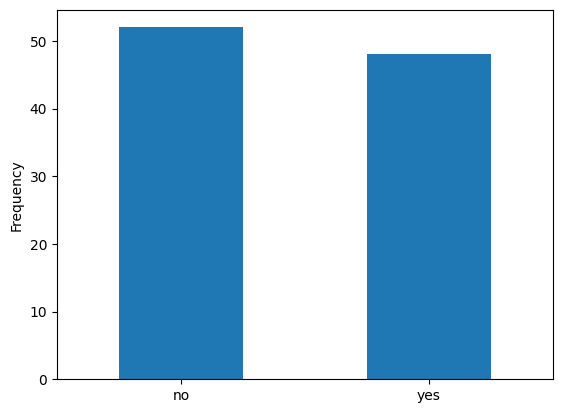

In [3]:
# Display the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

# Display the first few rows of the DataFrame.
display(df.head())

# Get a summary of the DataFrame.
print("\nDataFrame Info:")
df.info()

# Calculate descriptive statistics for numerical columns.
print("\nDescriptive Statistics:")
display(df.describe())

# Investigate the distribution of the target variable.
print("\nTarget Variable Distribution:")
print(df['is_fake'].value_counts())
df['is_fake'].value_counts().plot(kind='bar')

# Examine the length distribution of the 'text' column.  Note: 'text' column is not present.
# We can examine the other text columns instead like 'title_length' and 'description_length'.
print("\nText Length Distribution (title_length):")
title_length_stats = df['title_length'].describe()
print(title_length_stats)
df['title_length'].plot(kind='hist')

print("\nText Length Distribution (description_length):")
description_length_stats = df['description_length'].describe()
print(description_length_stats)
df['description_length'].plot(kind='hist')

# Check for missing values in relevant columns.
print("\nMissing Values:")
print(df.isnull().sum())

In [4]:
# Check for missing values again.
print("\nMissing Values (re-check):")
print(df.isnull().sum())

# No irrelevant columns were identified in the previous steps,
# so we don't remove any columns here.  If there were irrelevant
# columns, they would be dropped here using df.drop(columns=['col1', 'col2'], inplace=True).

# Display the first few rows of the cleaned DataFrame and its shape.
display(df.head())
print("\nDataFrame Shape:", df.shape)
print("\nNumber of rows:", df.shape[0])
print("\nColumn names:", df.columns.tolist())


Missing Values (re-check):
title_length           0
description_length     0
has_company_profile    0
is_fake                0
dtype: int64


,title_length,description_length,has_company_profile,is_fake
0,72,740,1,yes
1,95,476,0,no
2,60,662,1,yes
3,34,317,0,no
4,67,884,0,yes



DataFrame Shape: (100, 4)

Number of rows: 100

Column names: ['title_length', 'description_length', 'has_company_profile', 'is_fake']


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Combine title and description lengths
df['total_length'] = df['title_length'] + df['description_length']

# 2. Scaling Numerical Features
numerical_features = ['title_length', 'description_length', 'has_company_profile', 'total_length']
scaler = StandardScaler()

# Split data before scaling
X = df.drop('is_fake', axis=1)
y = df['is_fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])


# 3. Encoding the Target Variable
y_train = np.where(y_train == 'yes', 1, 0)
y_test = np.where(y_test == 'yes', 1, 0)

# Convert scaled features back to a DataFrame for easier handling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_features, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_features, index=X_test.index)

In [7]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

# Train the model
logreg_model.fit(X_train_scaled_df, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_scaled_df)

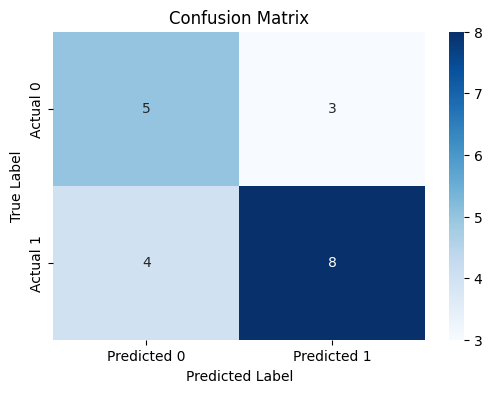

Accuracy: 0.65
Precision: 0.73
Recall: 0.67
F1-score: 0.70
AUC-ROC: 0.65


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))  # Adjust figure size for better visualization
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")